### Mouselinos Spyridon
#### January 2020
#### HomeWork 3
***

### Exersize 4

In [1]:
# Imports
import scipy.io as sio
import numpy as np
from numpy.linalg import pinv
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model

# Data Loading
Training_Set = sio.loadmat('Training_Set.mat')
X = Training_Set['X']
y = Training_Set['y']

In [2]:
### Let's Create Our Custom Least Squares Estimators with option for Ridge Regression
class LSEstimator:
    def __init__(self, l2=0, extend_with_1=True):
        self.l2 = l2
        self.is_fit_ = False
        self.theta = None
        self.extend_with_1 = extend_with_1
        return
    
    def fit(self,X,y):
        train_points_len = len(X)
        label_points_len = len(y)
        assert train_points_len == label_points_len
        
        ### If the model needs to be extended with 1 do it
        if self.extend_with_1:
            ### Add leading '1' to the X's
            X = np.c_[np.ones(len(X)),X]
        else:
            ### Else build a model without Bias, e.g Keep X as it is
            pass
        

        ### Now let's calculate the X^T matrix
        XT = np.transpose(X)

        ### Now the X^T * X
        XTX = np.matmul(XT,X)
        
        ### Now let's add the regularization term
        XTXL2 = XTX + self.l2*np.identity(XTX.shape[0])

        ### Now the inverse of (XT * X) --> (XT *X)^(-1)
        invXTX = pinv(XTXL2)

        ### Now the Θ parameter vector can be given as
        theta = np.matmul(np.matmul(invXTX,XT),y)
        
        ### Raise fit flag 
        self.is_fit_ = True
        self.theta = theta
        return theta
    
    
    
    def predict(self,X, y_true=None):
        if not(self.is_fit_):
            raise ValueError("Fit Model On Data First!\n")
        else:
            if self.extend_with_1:
                ### Add leading '1' to the X's
                X = np.c_[np.ones(len(X)),X]
            else:
                ### Dont add leading '1', keep X as it is
                pass
            
            y_predicted = np.matmul(X,self.theta)
            mse = None
            if y_true is not None:
                error = y_true - y_predicted
                square_error = error*error
                mse = square_error.mean()
                
            return y_predicted, mse
        
    
    def fit_predict(self,X,y):
        self.fit(X=X,y=y)
        pred,mse = self.predict(X=X, y_true=y)
        return pred, mse
    
    
    def coeff(self):
        #Let's print the coefficients
        for idx, f in enumerate(self.theta):
            print("Theta_{} coefficient is {}".format(idx,f[0]))
        return

### Plot the Data

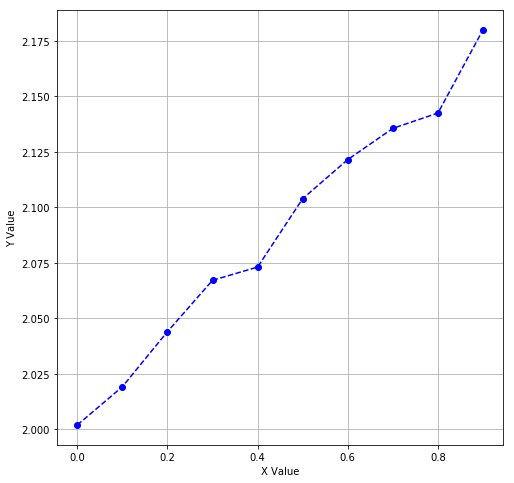

In [3]:
plt.figure(figsize=(8,8))
plt.plot(X,y,'bo--')
plt.ylabel('Y Value')
plt.xlabel('X Value')
plt.grid(True)
plt.show()
plt.close()

###  Fit a 8th degree polynomial on the data using the LS estimator and plot the results

In [4]:
from sklearn.preprocessing import PolynomialFeatures
### Let's create X_new as the X for the 8th degree polynomial
poly = PolynomialFeatures(degree=8)
X_new = poly.fit_transform(X)

In [5]:
# Let's print the shape for consistency
print(X_new.shape)

(10, 9)


In [6]:
# Let's create our Model
# SK Learn
# reg = linear_model.LinearRegression()

reg = LSEstimator()

In [7]:
y_predicted, mse = reg.fit_predict(X=X_new, y=y)

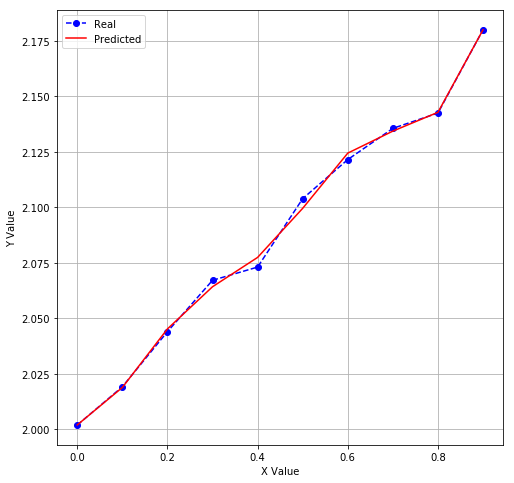

In [8]:
# Plot the result
plt.figure(figsize=(8,8))
plt.plot(X,y,'bo--', label='Real')
plt.plot(X,y_predicted,'r', label='Predicted')
plt.ylabel('Y Value')
plt.xlabel('X Value')
plt.grid(True)
plt.legend()
plt.show()
plt.close()

In [9]:
reg.coeff()

Theta_0 coefficient is 0.9768496984485537
Theta_1 coefficient is 1.025141946868244
Theta_2 coefficient is 0.25940478320179494
Theta_3 coefficient is -3.8324087748487727
Theta_4 coefficient is 49.41994453724328
Theta_5 coefficient is -262.2042554712316
Theta_6 coefficient is 698.2982435550948
Theta_7 coefficient is -986.5828785221674
Theta_8 coefficient is 706.1381708921981
Theta_9 coefficient is -201.4493689882729


In [10]:
# We can observe very large values in the coefficients over the 5th degree, that is a sign of an unstable model and a model that is prone to overfitting!

### Fit a 8th degree polynomial on the data using the ridge regression estimator and plot the results

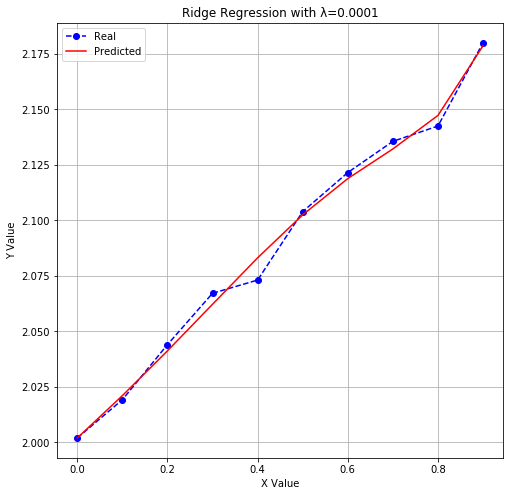

**************************
Theta_0 coefficient is 1.000972241552069
Theta_1 coefficient is 1.0009722415129056
Theta_2 coefficient is 0.18570464424476363
Theta_3 coefficient is 0.047006805159366394
Theta_4 coefficient is 0.05302097413412454
Theta_5 coefficient is -0.08199849774464951
Theta_6 coefficient is -0.16863317279571355
Theta_7 coefficient is -0.11751037582747514
Theta_8 coefficient is 0.052501359230289424
Theta_9 coefficient is 0.2870727652482117
**************************





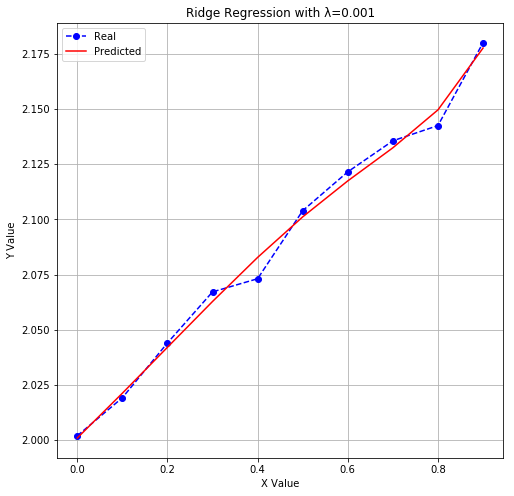

**************************
Theta_0 coefficient is 1.0004729263637282
Theta_1 coefficient is 1.0004729263552314
Theta_2 coefficient is 0.19908034436132027
Theta_3 coefficient is 0.04299717859435148
Theta_4 coefficient is -0.040734796007417806
Theta_5 coefficient is -0.06652277805283724
Theta_6 coefficient is -0.049778648664435154
Theta_7 coefficient is -0.006296210354860277
Theta_8 coefficient is 0.04905710891360249
Theta_9 coefficient is 0.10519808209732684
**************************





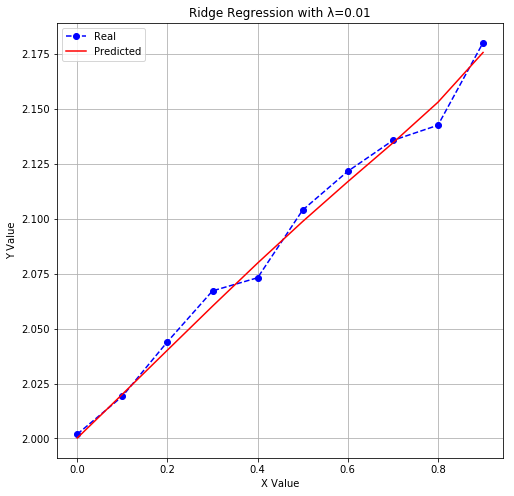

**************************
Theta_0 coefficient is 1.0001043871821036
Theta_1 coefficient is 1.0001043871815112
Theta_2 coefficient is 0.19747023835110733
Theta_3 coefficient is 0.018250328141564465
Theta_4 coefficient is -0.025183982380213132
Theta_5 coefficient is -0.025663617678090167
Theta_6 coefficient is -0.012439270304360095
Theta_7 coefficient is 0.0039939364366469166
Theta_8 coefficient is 0.01948461846649341
Theta_9 coefficient is 0.0324356862722075
**************************





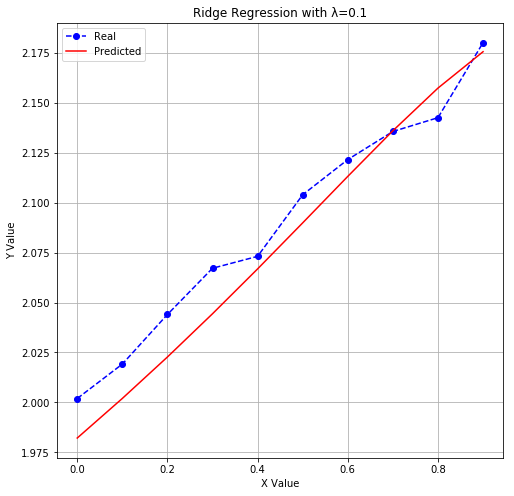

**************************
Theta_0 coefficient is 0.9910876484454434
Theta_1 coefficient is 0.991087648445449
Theta_2 coefficient is 0.19349883423025194
Theta_3 coefficient is 0.04615263189349683
Theta_4 coefficient is 0.0035747016992114244
Theta_5 coefficient is -0.008456576379820724
Theta_6 coefficient is -0.010315417384552106
Theta_7 coefficient is -0.00872860046122681
Theta_8 coefficient is -0.006179853013047687
Theta_9 coefficient is -0.0036236261282468485
**************************





In [11]:
### Iterate over 4 values of l2 penalty
for l2 in [0.0001,0.001,0.01,0.1]:
    reg = LSEstimator(l2=l2)
    y_predicted, mse = reg.fit_predict(X=X_new, y=y)
    # Plot the result
    plt.figure(figsize=(8,8))
    plt.title("Ridge Regression with λ={}".format(l2))
    plt.plot(X,y,'bo--', label='Real')
    plt.plot(X,y_predicted,'r', label='Predicted')
    plt.ylabel('Y Value')
    plt.xlabel('X Value')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    #Let's print the coefficients
    print("**************************")
    reg.coeff()
    print("**************************")
    print("\n\n")

### Fit a 8th degree polynomial on the data using the lasso regression estimator and plot the results

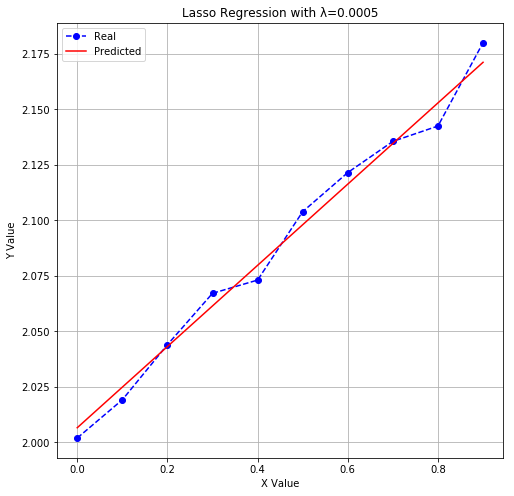

**************************
Theta_0 coefficient is 2.006593980331038
Theta_1 coefficient is 0.0
Theta_2 coefficient is 0.18289385871249628
Theta_3 coefficient is 0.0
Theta_4 coefficient is 0.0
Theta_5 coefficient is 0.0
Theta_6 coefficient is 0.0
Theta_7 coefficient is 0.0
Theta_8 coefficient is 0.0
Theta_9 coefficient is 0.0
**************************





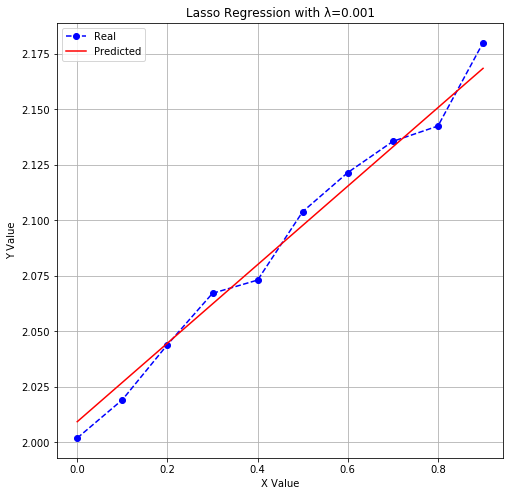

**************************
Theta_0 coefficient is 2.009321253058311
Theta_1 coefficient is 0.0
Theta_2 coefficient is 0.1768332526518902
Theta_3 coefficient is 0.0
Theta_4 coefficient is 0.0
Theta_5 coefficient is 0.0
Theta_6 coefficient is 0.0
Theta_7 coefficient is 0.0
Theta_8 coefficient is 0.0
Theta_9 coefficient is 0.0
**************************





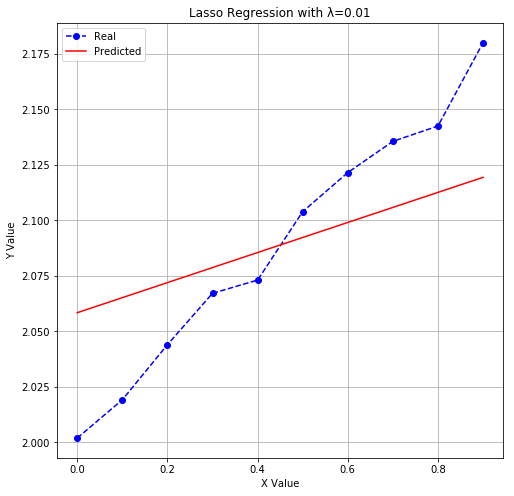

**************************
Theta_0 coefficient is 2.05841216214922
Theta_1 coefficient is 0.0
Theta_2 coefficient is 0.06774234356098113
Theta_3 coefficient is 0.0
Theta_4 coefficient is 0.0
Theta_5 coefficient is 0.0
Theta_6 coefficient is 0.0
Theta_7 coefficient is 0.0
Theta_8 coefficient is 0.0
Theta_9 coefficient is 0.0
**************************





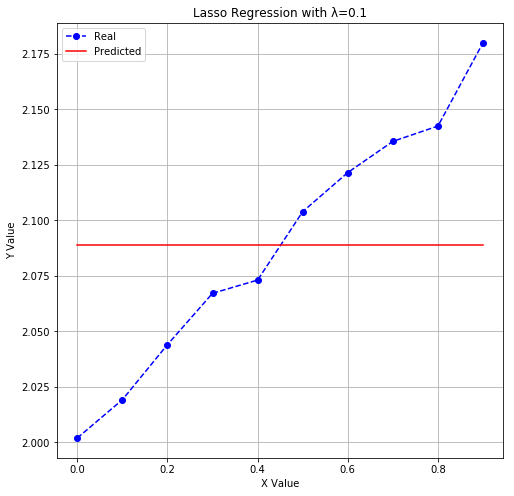

**************************
Theta_0 coefficient is 2.0888962167516616
Theta_1 coefficient is 0.0
Theta_2 coefficient is 0.0
Theta_3 coefficient is 0.0
Theta_4 coefficient is 0.0
Theta_5 coefficient is 0.0
Theta_6 coefficient is 0.0
Theta_7 coefficient is 0.0
Theta_8 coefficient is 0.0
Theta_9 coefficient is 0.0
**************************





In [12]:
### Iterate over 4 values of l1 penalty
for l1 in [0.0005,0.001,0.01,0.1]:
    reg = linear_model.Lasso(alpha=l1)
    reg.fit(X=X_new,y=y)
    y_predicted = reg.predict(X_new)
    # Plot the result
    plt.figure(figsize=(8,8))
    plt.title("Lasso Regression with λ={}".format(l1))
    plt.plot(X,y,'bo--', label='Real')
    plt.plot(X,y_predicted,'r', label='Predicted')
    plt.ylabel('Y Value')
    plt.xlabel('X Value')
    plt.grid(True)
    plt.legend()
    plt.show()
    plt.close()
    #Let's print the coefficients
    print("**************************")
    print("Theta_0 coefficient is {}".format(reg.intercept_[0]))
    for idx, f in enumerate(reg.coef_):
        print("Theta_{} coefficient is {}".format(idx+1,f))
    print("**************************")
    print("\n\n")

***
### Exersize 5
***

In [13]:
# Set the Seed
np.random.seed(666)

In [ ]:
### Function that creates 1 dataset.
def generate_univariate_dataset(mean=0,std=1,n_points=30):
    ### Create the X points
    X = np.random.normal(loc=mean,scale=std,size=n_points)
    
    ### Create the Y points as X*2
    y = X*2
    
    ### Create the noisy y
    y = y + np.random.normal(0,np.sqrt(64),len(X))
    
    ### Reshape the data so that Sklearn can understand them
    X = X.reshape(-1, 1)
    return X,y

In [ ]:
# A function that creates n_datasets
def create_n_datasets(n):
    dataset_list = []
    for i in range(0,n):
        dataset_list.append(generate_univariate_dataset())
    return dataset_list

### Calculate the linear estimates of every Dataset

In [ ]:
datasets = create_n_datasets(n=50)

In [ ]:
### Dataset Coef is now a Numpy Array of [theta_0, theta_1] of every dataset.
dataset_coef = np.empty((50,1))

for idx in range(0,len(datasets)):
    ### Get the i'th dataset
    X, y = datasets[idx]
    ### Fit it with a linear model
    reg = LSEstimator(l2=0, extend_with_1=False)
    reg.fit(X,y)
    dataset_coef[idx] = reg.theta[0]

In [ ]:
### Let's find the MSE
theta_estimates = dataset_coef
theta_estimates_minus_mean = theta_estimates - 2
theta_estimates_minus_mean_squared = theta_estimates_minus_mean**2
MSE = theta_estimates_minus_mean_squared.mean()
print("Mean Square Error of Estimates is : {}".format(MSE))

Mean Square Error of Estimates is : 2.5045779281294394


In [ ]:
### Let's calculate the mean and std of the estimates
theta_estimation_mean = theta_estimates.mean(axis=0)
theta_estimation_std = theta_estimates.std(axis=0)

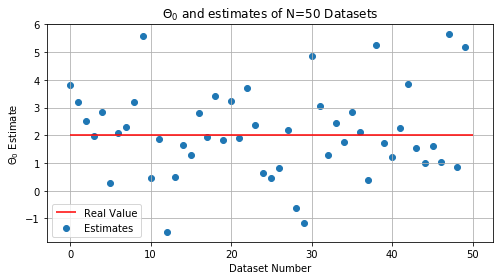

In [ ]:
### Let's plot the theta estimates and how they spread around 2.
plt.figure(figsize=(8,4))
plt.title("$Θ_0$ and estimates of N=50 Datasets")
plt.hlines(xmin=0,xmax=50,y=2,colors ='r',label='Real Value')
plt.scatter(x=np.arange(0,50), y=theta_estimates, label='Estimates')
plt.xlabel('Dataset Number')
plt.ylabel('$Θ_0$ Estimate')
plt.legend(loc=3)
plt.grid(True)
plt.show()
plt.close()

***
### Exersize 6
***

In [ ]:
### Let's create 50 datasets of 30 points for the experiments

In [ ]:
datasets = create_n_datasets(n=50)

In [ ]:
### Performs Exersize 5 and returns MSE for specific l2 penalty with our custom Ridge Regression Model
def perform_experiment(l2=0,datasets=datasets):
    dataset_coef = np.empty((50))
    for idx in range(0,len(datasets)):
        ### Get the i'th dataset
        X, y = datasets[idx]
        ### Fit it with a linear model
        reg = LSEstimator(l2=l2, extend_with_1=False)
        reg.fit(X,y)
        dataset_coef[idx] = reg.theta[0]
        se  = (dataset_coef - 2)**2
        mse = se.mean()
    return mse

In [ ]:
l2_array = np.arange(0, 10000, 0.1)
mse_array = np.zeros_like(l2_array)

for idx, l2 in enumerate(l2_array):
    mse_array[idx] = perform_experiment(l2=l2, datasets=datasets)

In [ ]:
### Let's Plot the MSE vs L2 Penalty In Large Scale
plt.figure(figsize=(20,20))
plt.title("MSE versus L2 Penalty")
plt.hlines(xmin=0,xmax=10000,y=MSE,colors ='r',label='Unbiased Estimator MSE')
plt.scatter(x=np.arange(0,10000,0.1), y=mse_array, label='Biased Estimator MSE')
plt.xlabel('L2 penalty')
plt.ylabel('MSE')
plt.ylim(0,4)
plt.legend(loc=1)
plt.grid(True)
plt.show()
plt.close()

In [ ]:
#### Now Let's Zoom to Find the required Area
plt.figure(figsize=(20,20))
plt.title("MSE versus L2 Penalty")
plt.vlines(ymin=0,ymax=4,x=2,colors ='g')
plt.vlines(ymin=0,ymax=4,x=45,colors ='g',label='Area of Best L2')
plt.axvspan(2, 45, alpha=0.5, color='g')
plt.hlines(xmin=0,xmax=1000,y=MSE,colors ='r',label='Unbiased Estimator MSE')
plt.scatter(x=np.arange(0,1000,0.1), y=mse_array[0:1000*10], label='Biased Estimator MSE')
plt.xlabel('L2 penalty')
plt.ylabel('MSE')
plt.ylim(0,4)
plt.legend(loc=1)
plt.grid(True)
plt.show()
plt.close()